# **Resilience & Covid-19 Lockdowns**

This predictive model predicts people's resilience towards mental distress (i.e., stress, anxiety, & depression) during pandemic lockdowns using the Big-4 personality traits (i.e., Extraversion, Agreeableness, Openness & Conscientiousness)

I created features (i.e., the Big-4 personality traits) using character strengths. I used characters within my dataset that most apply to the specific traits (e.g., perspective, perseverance, bravery, etc.)

https://www.kaggle.com/datasets/mathchi/covid19-and-character-strengths


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from pandas.core import groupby
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# **Feature Engineering**

In [ ]:
characteristics = pd.read_csv('DB.csv')

# changing gender & student into numbers
characteristics['gender'] = (characteristics['Gender'] == 'Female').astype(int)
characteristics['student'] = (characteristics['Student'] == 'Student').astype(int)

df = characteristics.drop(['Restraint', 'Transcendence', 'Interpersonal', 'Openness', 'Gender',
                           'Age', 'gender', 'Work', 'Student', 'Day', 'student', 'Sons'], axis=1)

df['DASS_21'] = (characteristics['DASS_21'] > 30).astype(int)
df = df.drop(['DASS_21'], axis=1)

# the Big-4 personality traits
ex = df['Zest']+ df['Judgment'] + df['Humor'] + df['Leadership'] + df['Bravery']
ex = ex/5
ag = df['Teamwork'] + df['Kindness'] + df['Fairness'] + df['Social_intelligence'] + df['Forgiveness']
ag = ag/5
op = df['Creativity'] + df['Curiosity'] + df['Love_of_learning'] + df['Appreciation_of_beauty'] + df['Perspective']
op = op/5
con = df['Self_regulation'] + df['Prudence'] + df['Perseverance'] + df['Honesty']
con = con/4

personality = pd.DataFrame({'Participant_No.': df['Participant'], 'Extraversion': ex, 'Agreeableness': ag, 'Openness': op,
                            'Conscientiousness': con})

df2 = pd.DataFrame({'Participant_No.': df['Participant'], 'G_health': df['GHQ_12'], 'Stress_sc': df['DASS_stress'],
                    'Anxiety_sc': df['DASS_anxiety'], 'Depression_sc': df['DASS_depression'], 'Covid-SE': df['SEC']})

df2['Risk_M.Disorders'] = np.where((df2['Anxiety_sc'] > 10) & (df2['Stress_sc'] > 10) &
                                (df2['Depression_sc'] > 10), "High Risk", "Low Risk")

df2['Risk_GM.Health'] = np.where((df2['G_health'] > 12), "High Risk", "Low Risk")
df2['Res_fac'] = np.where((df2['Covid-SE'] > 12), "High", "Low")

df2['Resilience'] = (df2['Res_fac'] == "High").astype(int)
final_df = pd.DataFrame({'Participant_No.': df2['Participant_No.'], 'Extraversion': ex, 'Agreeableness': ag,
                        'Openness': op, 'Conscientiousness': con, 'Resilience': df2['Resilience']})

X = final_df.drop(['Participant_No.', 'Resilience'], axis=1)
y = final_df['Resilience']

final_df

,Participant_No.,Extraversion,Agreeableness,Openness,Conscientiousness,Resilience
0,1,18.2,20.2,17.0,16.25,0
1,2,15.8,17.2,17.2,17.00,1
2,3,17.0,15.0,16.2,17.50,1
3,4,17.0,16.2,22.2,21.00,1
4,5,18.8,16.4,23.0,22.75,1
...,...,...,...,...,...,...
939,940,21.4,19.8,20.2,19.25,1
940,941,18.6,21.4,17.0,17.00,1
941,942,22.8,21.4,24.2,19.75,1
942,943,14.4,16.6,12.4,18.00,0


# **Plots**

In [ ]:
# Df for the plots
characteristics['gender'] = (characteristics['Gender'] == 'Female').astype(int)
characteristics['student'] = (characteristics['Student'] == 'Student').astype(int)

df0 = characteristics.drop(['Participant', 'Restraint', 'Transcendence', 'Interpersonal',
                          'Openness', 'Gender', 'GHQ_12', 'Age', 'gender', 'Work',
                          'SEC', 'Student', 'Day', 'student', 'DASS_anxiety', 'DASS_depression',
                          'DASS_stress', 'Sons'], axis=1)

X0 = df0.drop(['DASS_21'], axis=1)
y0 = df0['DASS_21']

Gender & Education/Work

Text(0.5, 1.0, 'Status')

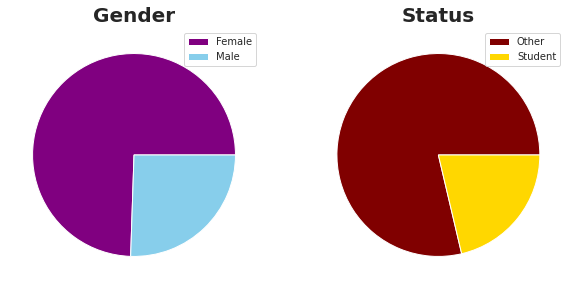

In [ ]:
student = characteristics['Student'].value_counts()
gender = characteristics['Gender'].value_counts()

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,5))
ax[0].pie(gender, colors=['purple', 'skyblue'])
ax[0].legend(["Female", "Male"], loc=0)
ax[0].set_title("Gender", fontweight='bold', fontsize=20)
ax[1].pie(student, colors=['maroon', 'gold'])
ax[1].legend(["Other", "Student"], loc=0)
ax[1].set_title("Status", fontweight='bold', fontsize=20)

Personal characters & Mental health

Text(0, 0.5, 'DASS Scale')

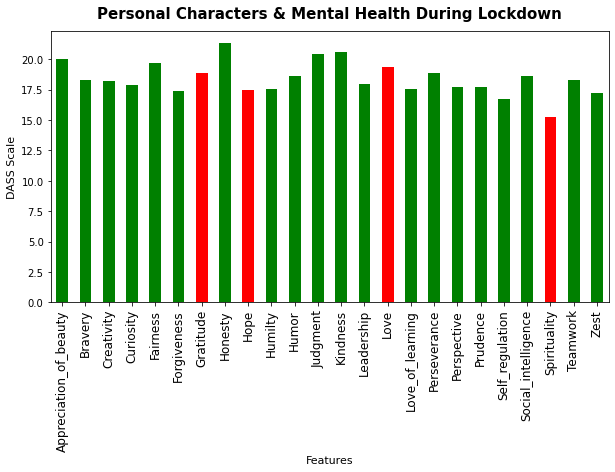

In [ ]:
plt.figure(figsize=(10,5))
colors = ["green" if i != 'Love' and i != 'Spirituality' and
          i != 'Gratitude' and i != 'Hope' and i != 'Humility'
          else "red" for i in X0]

X0.mean().plot(kind='bar', y=characteristics['DASS_21'], color=colors)

plt.title('Personal Characters & Mental Health During Lockdown',
          fontdict={'fontsize':15}, pad=12, fontweight='bold')
plt.xlabel('Features', fontdict={'fontsize':11})
plt.xticks(fontsize=12)
plt.ylabel('DASS Scale', fontdict={'fontsize':11})

Depression, Anxiety & Stress during lockdown

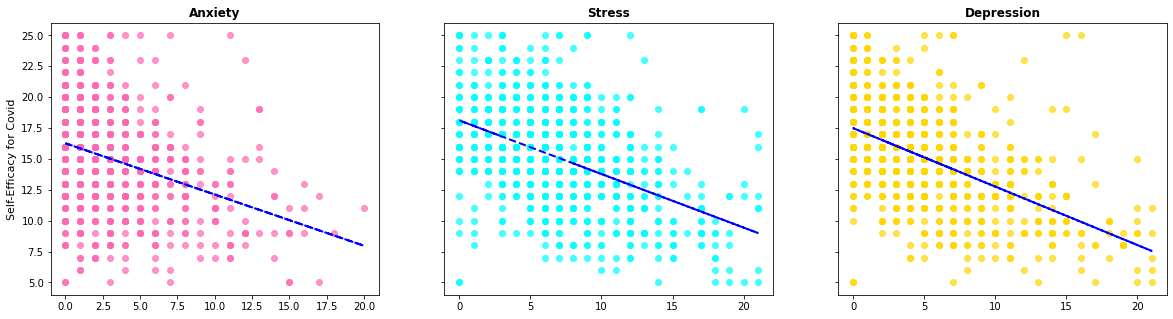

In [ ]:
y_ = characteristics['SEC']

x1 = characteristics['DASS_anxiety']
x2 = characteristics['DASS_stress']
x3 = characteristics['DASS_depression']

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,5))

ax[0].scatter(x1,y_, c='hotpink', alpha=.7)
ax[0].set_title("Anxiety", fontweight='bold')
m, b = np.polyfit(x1, y_, 1)
ax[0].plot(x1, m*x1 + b, 'b--', lw=2)
ax[0].set_ylabel('Self-Efficacy for Covid', fontdict={'fontsize':11})

ax[1].scatter(x2,y_, c='cyan', alpha=.7)
ax[1].set_title("Stress", fontweight='bold')
m, b = np.polyfit(x2, y_, 1)
ax[1].plot(x2, m*x2 + b, 'b--', lw=2)

ax[2].scatter(x3,y_, c='gold', alpha=.7)
ax[2].set_title("Depression", fontweight='bold')
m, b = np.polyfit(x3, y_, 1)
ax[2].plot(x3, m*x3 + b, 'b--', lw=2)

Big-4 Personality Traits & Mental Health

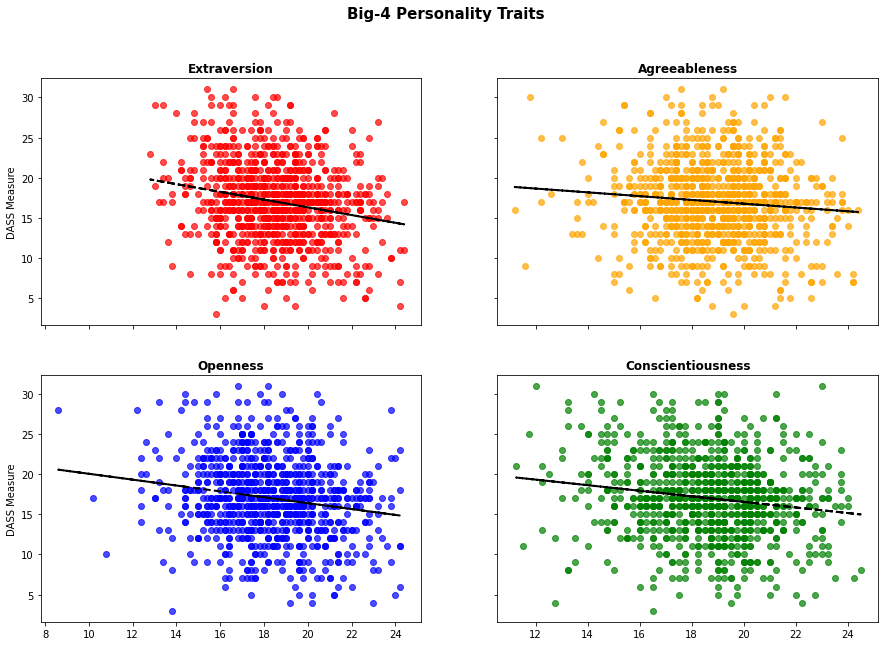

In [ ]:
y_ = characteristics['GHQ_12']

x1 = final_df['Extraversion']
x2 = final_df['Agreeableness']
x3 = final_df['Openness']
x4 = final_df['Conscientiousness']

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,10))
plt.suptitle("Big-4 Personality Traits", fontsize=15,
             fontweight='bold')

ax[0,0].scatter(x1,y_, c='r', alpha=.7)
ax[0,0].set_title("Extraversion", fontweight='bold')
m, b = np.polyfit(x1, y_, 1)
ax[0,0].plot(x1, m*x1 + b, 'k--', lw=2)
ax[0,0].set_ylabel('DASS Measure', fontdict={'fontsize':10})

ax[0,1].scatter(x2,y_, c='orange', alpha=.7)
ax[0,1].set_title("Agreeableness", fontweight='bold')
m, b = np.polyfit(x2, y_, 1)
ax[0,1].plot(x2, m*x2 + b, 'k--', lw=2)

ax[1,0].scatter(x3,y_, c='b', alpha=.7)
ax[1,0].set_title("Openness", fontweight='bold')
m, b = np.polyfit(x3, y_, 1)
ax[1,0].plot(x3, m*x3 + b, 'k--', lw=2)
ax[1,0].set_ylabel('DASS Measure', fontdict={'fontsize':10})

ax[1,1].scatter(x4,y_, c='g', alpha=.7)
ax[1,1].set_title("Conscientiousness", fontweight='bold')
m, b = np.polyfit(x4, y_, 1)
ax[1,1].plot(x4, m*x4 + b, 'k--', lw=2)

# **Feature Selection**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

reg = MLPRegressor(max_iter=1000)
sel = SequentialFeatureSelector(reg, n_features_to_select=1)
sel.fit(X, y)
X = sel.transform(X)
print(X.shape)

X_train = X[:len(X)//2]
y_train = y[:len(X)//2]
X_test = X[len(X)//2:]
y_test = y[len(X)//2:]

(944, 1)


# **Model Selection**

Mean Absolute Error = 0.3513478299916684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Low'), Text(0, 0, 'High')]

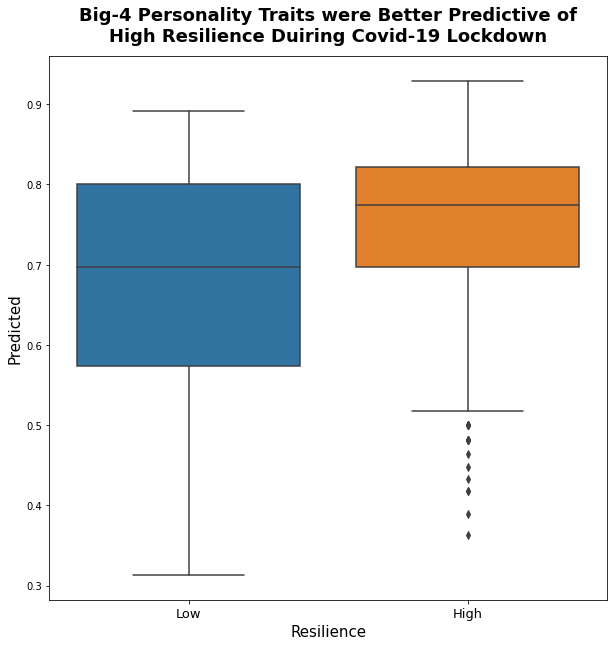

In [ ]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Absolute Error = " + str(mean_absolute_error(y_test, y_pred)))

plt.figure(figsize=(10,10))
plt.ylabel('Predicted', fontdict={'fontsize':15})
plt.xlabel('Predicted', fontdict={'fontsize':15})
plt.title("Big-4 Personality Traits were Better Predictive of\nHigh Resilience Duiring Covid-19 Lockdown", fontdict={'fontsize':18}, pad=15,
          fontweight='bold')
sns.set_style('whitegrid')
g = sns.boxplot(y_test, y_pred)
g.set_xticklabels(["Low", "High"], fontdict={'fontsize':13})

# **Hyperparameter Selection**

In [ ]:
param_dist = {'hidden_layer_sizes': randint(1, 500),
              'max_iter': [100, 500, 1000],
              'learning_rate_init': uniform(loc=0.0, scale=0.1)}
search = RandomizedSearchCV(MLPClassifier(), param_dist, n_iter=10)
search.fit(X_train, y_train)
simplefilter("ignore", category=ConvergenceWarning)
cv_results = pd.DataFrame(search.cv_results_)
print(cv_results.loc[:, ['param_hidden_layer_sizes', 'param_max_iter', 'param_learning_rate_init', 'mean_test_score']])
print(search.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


  param_hidden_layer_sizes param_max_iter param_learning_rate_init  \
0                      351            100                 0.002015   
1                      375           1000                 0.084636   
2                      262            100                 0.080026   
3                      232           1000                 0.016308   
4                        3            100                  0.03588   
5                      420            100                 0.048033   
6                       90            500                 0.078694   
7                       73            100                 0.066963   
8                       23            100                 0.013905   
9                      121            500                 0.030558   

   mean_test_score  
0         0.745801  
1         0.739418  
2         0.739418  
3         0.735162  
4         0.745801  
5         0.743673  
6         0.728847  
7         0.726764  
8         0.737335  
9         0.733080 